In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("train_edit.csv")
validation_df = pd.read_csv("valid_edit.csv")

In [3]:
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]

X_val = validation_df.drop(columns=["target"])
y_val = validation_df["target"]

In [4]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [5]:
y_pred = model.predict(X_val)

In [6]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.98
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       0.00      0.00      0.00        66

    accuracy                           0.98      3642
   macro avg       0.49      0.50      0.50      3642
weighted avg       0.96      0.98      0.97      3642



c:\Users\Darin_btw\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darin_btw\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darin_btw\Documents\GitHub\2_Intensiv_2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

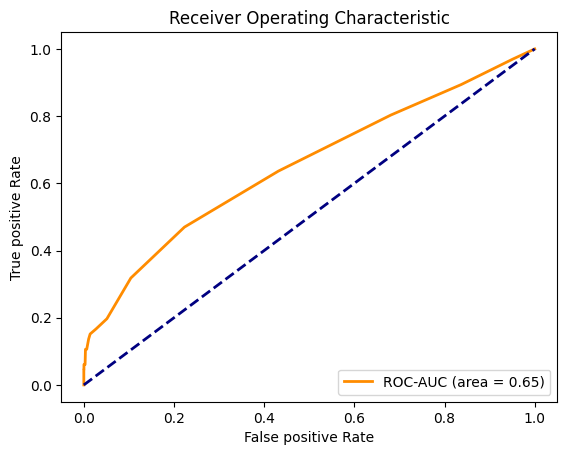

In [7]:
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()